In [1]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix

design_matrix_file = "../tests/input_files/de_design_matrix.tsv"

design_matrix = pd.read_csv(design_matrix_file, sep="\t")
design_matrix["batch"] = [1] * 10 + [2] * 8
design_matrix

/home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)



,sample,group,batch
0,AAS_P2009_167,6,1
1,AAS_P2009_169,4,1
2,AAS_P2009_176,6,1
3,AAS_P2009_178,4,1
4,AAS_P2009_187,4,1
5,AAS_P2009_194,6,1
6,AAS_P2009_196,4,1
7,AAS_P2009_203,6,1
8,AAS_P2009_205,4,1
9,AAS_P2009_212,6,1


In [2]:
import numpy as np

data_file = pd.read_csv("../tests/input_files/de_matrix.tsv", sep="\t")
quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
).normalize(method="log2")

data_file = quant_matrix.to_df()
for sample in design_matrix[design_matrix["batch"] == 1]["sample"]:
    data_file[sample] = data_file[sample] + 3

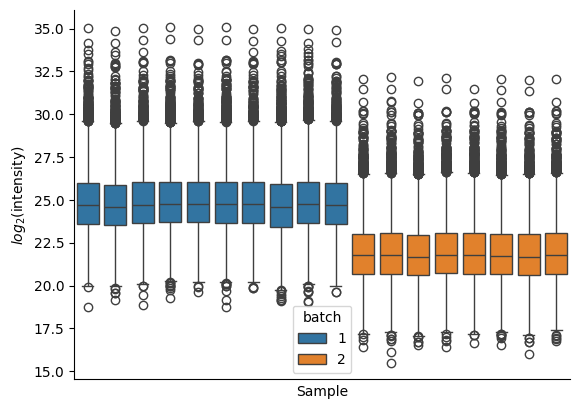

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = quant_matrix.filter()
plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)

plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
plot_df.sort_values("batch", inplace=True)

sns.boxplot(plot_df, x="level_1", y=0, hue="batch", palette="tab10")

sns.despine()
plt.xticks([])
plt.xlabel("Sample")
plt.ylabel(r"$log_2$(intensity)")

plt.savefig("../docs/img/non_corrected_boxes.png", dpi=300)

[WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


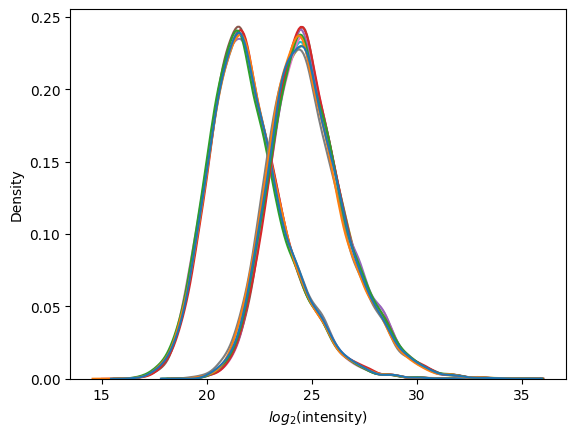

In [4]:
sns.kdeplot(plot_df, x=0, hue="sample", palette="tab10", common_norm=False)
plt.legend().remove()
plt.xlabel(r"$log_2$(intensity)")
plt.savefig("../docs/img/non_corrected_density.png", dpi=300)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/dpks/correction.py:61: RuntimeWarning: Mean of empty slice
  reference_mean = np.nanmean(reference_data, axis=0)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/dpks/correction.py:68: RuntimeWarning: Mean of empty slice
  batch_mean = np.nanmean(batch_data, axis=0)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/dpks/correction.py:72: RuntimeWarning: invalid value encountered in divide
  reference_std / batch_std

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/dpks/correction.py:72: RuntimeWarning: divide by zero encountered in divide
  reference_std / batch_std

[WARNING] /home/aaro

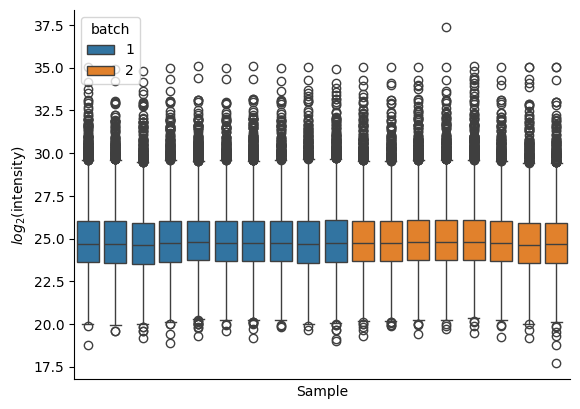

In [5]:
quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter()
    .correct(method="mean", reference_batch=1)
)

plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)
plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
plot_df.sort_values("batch", inplace=True)
sns.boxplot(plot_df, x="level_1", y=0, hue="batch", palette="tab10")
sns.despine()
plt.xticks([])
plt.xlabel("Sample")
plt.ylabel(r"$log_2$(intensity)")

plt.savefig("../docs/img/corrected_boxes.png", dpi=300)

[WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


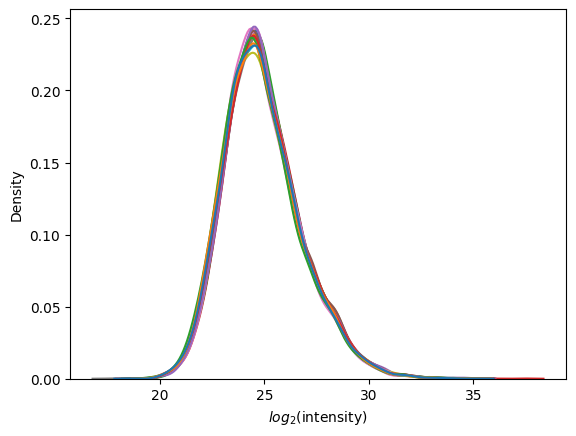

In [6]:
sns.kdeplot(plot_df, x=0, hue="sample", palette="tab10",  common_norm=False)
plt.legend().remove()
plt.xlabel(r"$log_2$(intensity)")
plt.savefig("../docs/img/corrected_density.png", dpi=300)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)



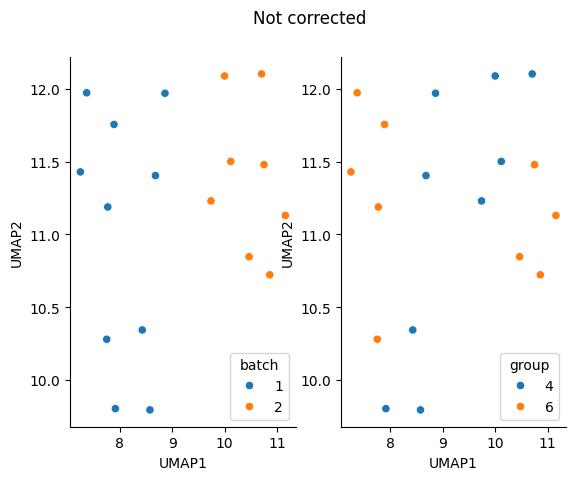

In [9]:
from umap import UMAP

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter().normalize(method="log2").impute(method="uniform_percentile")
)

X = pd.DataFrame(quantified_data.quantitative_data.X).fillna(0).T

y = design_matrix["group"]

X_reduced = UMAP(random_state=42).fit_transform(X)

plot_df = pd.DataFrame(X_reduced, columns=["UMAP1", "UMAP2"])
plot_df["group"] = design_matrix["group"]
plot_df["batch"] = design_matrix["batch"]

fig, axs = plt.subplots(1,2)
sns.scatterplot(plot_df, x="UMAP1", y="UMAP2", hue="batch", ax=axs[0], palette="tab10")
sns.scatterplot(plot_df, x="UMAP1", y="UMAP2", hue="group", ax=axs[1], palette="tab10")

plt.suptitle("Not corrected")

for ax in axs.ravel():
    sns.despine(ax=ax)

plt.savefig("../docs/img/non_corrected_umaps.png", dpi=300)


[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



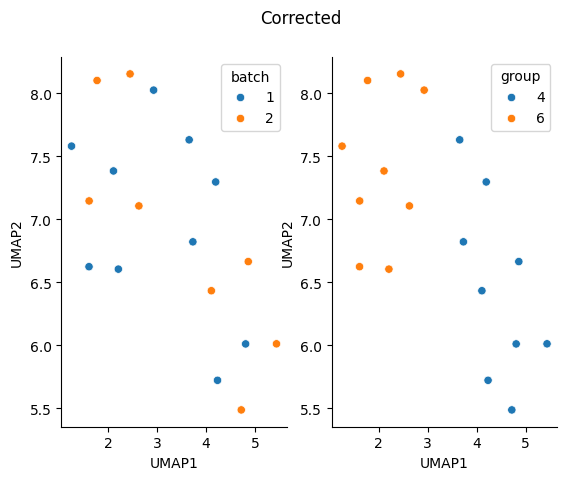

In [10]:
from umap import UMAP

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter().impute(method="uniform_percentile").correct(method="mean", reference_batch=1)
)

X = pd.DataFrame(quantified_data.quantitative_data.X).fillna(0).T

y = design_matrix["group"]

X_reduced = UMAP(random_state=42).fit_transform(X)

plot_df = pd.DataFrame(X_reduced, columns=["UMAP1", "UMAP2"])
plot_df["group"] = design_matrix["group"]
plot_df["batch"] = design_matrix["batch"]

fig, axs = plt.subplots(1,2)
sns.scatterplot(plot_df, x="UMAP1", y="UMAP2", hue="batch", ax=axs[0], palette="tab10")
sns.scatterplot(plot_df, x="UMAP1", y="UMAP2", hue="group", ax=axs[1], palette="tab10")

plt.suptitle("Corrected")


for ax in axs.ravel():
    sns.despine(ax=ax)

plt.savefig("../docs/img/corrected_umaps.png", dpi=300)